# Sequential Dense Neural Networks for the Diagnosis of Medical Conditions

#### <br> This notebook outlines our machine learning based Autonomous approach to Diagnose medical conditions and respond effectly.

#### PART ONE:
<br> Setting Up the environment


In [17]:
import plaidml.keras
plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K


#### PART TWO:
<br>
Imports! Imports! Imports!

In [18]:
import numpy as np                                         #  Importing numpy for data preprocessing.
import tensorflow as tf                                    #   Importing Tensorflow to perform implement the models.
import pandas as pd                                        #   Importing pandas for data preprocessing and handling.
import seaborn as sns                                      #  Importing Seaborn to to implement visualisations.
from pylab import rcParams
import matplotlib.pyplot as plt                            #   Imporing matplot lib to plot the graphs.
from matplotlib import rc
from sklearn.model_selection import train_test_split       #      Importing Sklearn for test-train sample split.
import importlib                                           #       Importing importlib to handle the imports
import math                                                #        Importing the math library for math operations.


%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1)  #     Setting visualistion style (bg_color, font_SIZE).
rcParams['figure.figsize'] = 14, 8                         #    Setting the size of the figure.
RANDOM_SEED = 42                                           #   Setting an initial seed value.
np.random.seed(RANDOM_SEED)                                #  Using a method from Numpy to generate a random seed.


ImportError: cannot import name 'GlobalOpDispatcher' from 'tensorflow.python.util.dispatch' (/Users/mohammedabbarroh/.pyenv/versions/3.8.10/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py)

#### PART THREE:
<br>
Loading the csv using the os module and then reading it using the pandas library.

In [24]:
cirrhosis_data = "cirrhosis.csv"                            # IDENTIFIES FILE NAME FOR LEARNING DATASET....
if os.path.isfile(cirrhosis_data):                           # CHECKS IF DATASET IS IN CURRENT WORKING DIR..
    data = pd.read_csv(cirrhosis_data)                        # READS THE FILE FROM CURRENT DIR AS DATAFRAME..
    print("'{}' Loaded Successfully!".format(cirrhosis_data))  # NOTIFIES USER THAT DATASET HAS BEEN LOADED!!!!
else:                                                           # IF DATASET NOT FOUND IN THE CURRENT DIR DO....
    print("Unable to Load {}!".format(cirrhosis_data))           # OUTPUTS ERROR MESSAGE FOR DATA LOADING FIALURE

'cirrhosis.csv' Loaded Successfully!


#### PART FOUR:
<br>
Initialize the dataset's Diagnosis column, populate it and examine this decisive metric.

In [4]:
Diagnosis_Stats = [0,0] # Order [ + , -]                  # CREATES OUR FINAL DIAGNOSIS METRIC.
def Status_to_Diagnosis(Status):                           # WE DEFINE A FUNCTION TO POPULATE OUR DIAGNOSIS METRIC.
                                                        # THIS FUNCTION WILL BE DERIVED FROM THE STATUS METRIC.
    if Status.upper() == "CL" or Status.upper() == "D":  # CHECKS IF THE THE PATIENT IS CENSORED OR DEAD.
        Diagnosis_Stats[0] = Diagnosis_Stats[0] + 1        # ADDS 1 TO THE (+) DIAGNOSIS_STATS COUNTER.
        return 1                                            # RETURNS 1 TO REPRESENTN POSITIVE DIAGNOSIS.
    else:                                                  # ElSE IF THE PATIENT IS JUST CENSORED.
        Diagnosis_Stats[1] = Diagnosis_Stats[1] + 1       # ADDS 1 TO (-) DIAGNOSIS COUNTER. 
        return 0                                         # RETURNS 0 TO REPRESENT A NEGATIVE DIAGNOSIS RESULT.

In [5]:
data['Diagnosis'] = data['Status'].apply(Status_to_Diagnosis).apply(int)    # POPULATES DIAGNOSIS USING Status Func!
print("Diagnosis Stat Results Overview:\nPositive: {}\tNegative: {}.\n".format(Diagnosis_Stats[0],Diagnosis_Stats[1]))
print("AVERAGE INFECTION RATE = {}".format(((Diagnosis_Stats[0]/Diagnosis_Stats[1])*100)))

Diagnosis Stat Results Overview:
Positive: 186	Negative: 232.

AVERAGE INFECTION RATE = 80.17241379310344


#### PART FIVE:
<br>
Working and Visualing our DATA, Critical analysis & informed decision making! SUPERVISION TIME!

In [6]:
data.describe()        # OUTPUTS BRIEF SUMMARY OF THE DATA WE'RE WORKING WITH!

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Diagnosis
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000,418.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272,0.444976
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042,0.497559
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,0.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000,0.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000,0.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000,1.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000,1.000000


In [7]:
data.shape    # OUTPUTS THE SHAPE OF THE DATAFRAME.

(418, 21)

In [8]:
data.columns # OUTPUTS THE CURRENT DATAFRAME COLUMN / FEATURE LABELS!

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage', 'Diagnosis'],
      dtype='object')

In [16]:
print("INCOMPLETE DATA\n..........\n{}".format(data.isna()))    # Examining the Uncompatible DATA.
data = data.dropna()               # Dropping that data from our dataframe to ensure training accuracy.
print("\n.............\n Removed Samples:  {}".format(data.shape))

INCOMPLETE DATA
..........
        ID  N_Days  Status   Drug    Age    Sex  Ascites  Hepatomegaly  \
0    False   False   False  False  False  False    False         False   
1    False   False   False  False  False  False    False         False   
2    False   False   False  False  False  False    False         False   
3    False   False   False  False  False  False    False         False   
4    False   False   False  False  False  False    False         False   
..     ...     ...     ...    ...    ...    ...      ...           ...   
307  False   False   False  False  False  False    False         False   
308  False   False   False  False  False  False    False         False   
309  False   False   False  False  False  False    False         False   
310  False   False   False  False  False  False    False         False   
311  False   False   False  False  False  False    False         False   

     Spiders  Edema  ...  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  \
0      Fa

In [17]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Diagnosis
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1979.166667,18189.326087,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507,3.039855,0.467391
std,91.662926,1112.380295,3843.555619,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315,0.853999,0.499842
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000,1.000000,0.000000
25%,79.750000,1185.750000,15162.500000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000,2.000000,0.000000
50%,157.500000,1788.000000,18156.500000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000,3.000000,0.000000
75%,240.250000,2689.750000,20667.500000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000,4.000000,1.000000
max,312.000000,4556.000000,28650.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000,1.000000


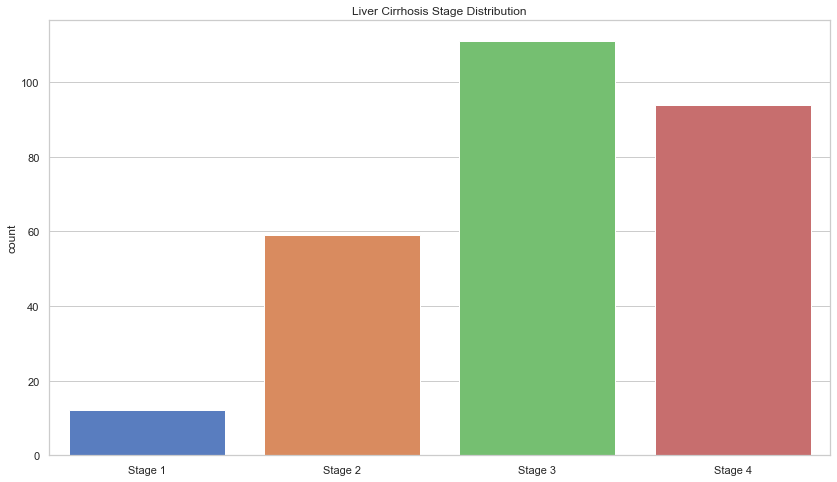

In [18]:
data['Stage'] = pd.to_numeric(data['Stage'], 'coerce').fillna(0).astype(int)
s = sns.countplot(x='Stage', data=data)
s.set_title("Liver Cirrhosis Stage Distribution")
s.set_xticklabels(['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.xlabel("");

In [19]:
 print("1:{} 2:{} 3:{} 4:{}".format(data['Stage']).count)

IndexError: Replacement index 1 out of range for positional args tuple

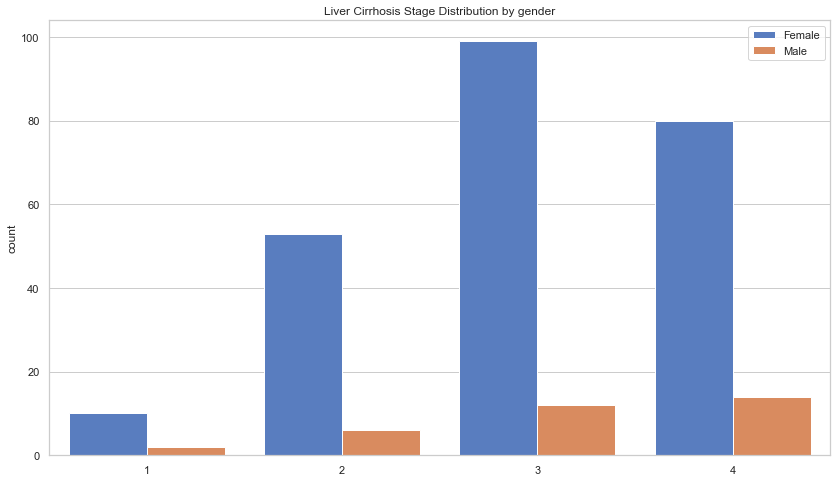

In [20]:
f = sns.countplot(x='Stage', data=data, hue='Sex')
plt.legend(['Female', 'Male'])
f.set_title("Liver Cirrhosis Stage Distribution by gender")
s.set_xticklabels(['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.xlabel("");

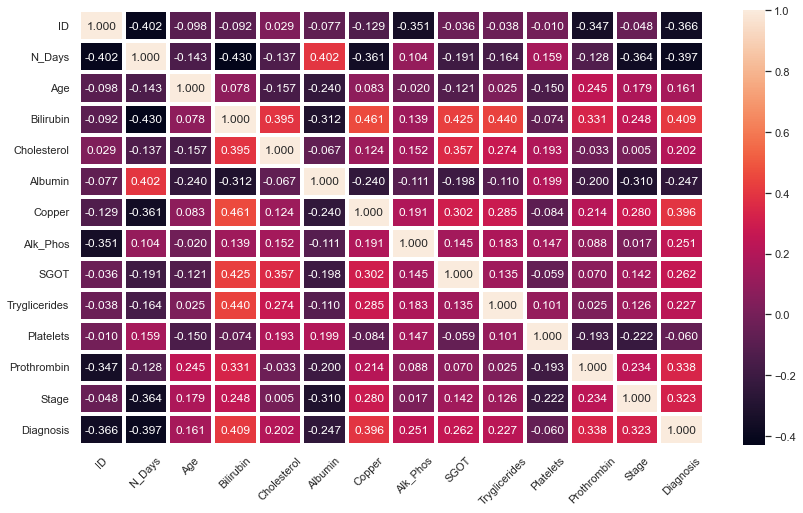

In [21]:
heat_map = sns.heatmap(data.corr(method='pearson'), annot=True, fmt='0.3f', linewidths=4)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

In [89]:
feature_columns = []

# numeric cols
for header in ['Age','Bilirubin', 'Cholesterol','Albumin',
                   'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
                   'Platelets','Prothrombin']:
      feature_columns.append(tf.feature_column.numeric_column(header))

# bucketized cols
age = tf.feature_column.numeric_column("Age")
Age_buckets = tf.feature_column.bucketized_column(age, boundaries=[3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 30000])
feature_columns.append(Age_buckets)

# indicator cols
data["Stage"] = data["Stage"].apply(str)
Stage = tf.feature_column.categorical_column_with_vocabulary_list(
      'Stage', ['1', '2','3','4'])
Stage_one_hot = tf.feature_column.indicator_column(Stage)
feature_columns.append(Stage_one_hot)

data["Drug"] = data["Drug"].apply(str)
Drug = tf.feature_column.categorical_column_with_vocabulary_list(
      'Drug', ['0','1'])
Drug_one_hot = tf.feature_column.indicator_column(Drug)
feature_columns.append(Drug_one_hot)

data["Sex"] = data["Sex"].apply(str)
Sex = tf.feature_column.categorical_column_with_vocabulary_list(
      'Sex', ['0', '1'])
Sex_one_hot = tf.feature_column.indicator_column(Sex)
feature_columns.append(Sex_one_hot)

data["Ascites"] = data["Ascites"].apply(str)
Ascites = tf.feature_column.categorical_column_with_vocabulary_list(
      'Ascites', ['0', '1'])
Ascites_one_hot = tf.feature_column.indicator_column(Ascites)
feature_columns.append(Ascites_one_hot)

data["Hepatomegaly"] = data["Hepatomegaly"].apply(str)
Hepatomegaly = tf.feature_column.categorical_column_with_vocabulary_list(
      'Hepatomegaly', ['0', '1'])
Hepatomegaly_one_hot = tf.feature_column.indicator_column(Hepatomegaly)
feature_columns.append(Hepatomegaly_one_hot)

data["Spiders"] = data["Spiders"].apply(str)
Spiders = tf.feature_column.categorical_column_with_vocabulary_list(
      'Spiders', ['0', '1'])
Spiders_one_hot = tf.feature_column.indicator_column(Spiders)
feature_columns.append(Spiders_one_hot)

data["Edema"] = data["Edema"].apply(str)
Edema = tf.feature_column.categorical_column_with_vocabulary_list(
      'Edema', ['0', '1','2','3'])
Edema_one_hot = tf.feature_column.indicator_column(Edema)
feature_columns.append(Edema_one_hot)

data["Status"] = data["Status"].apply(str)
Status = tf.feature_column.categorical_column_with_vocabulary_list(
      'Status', ['0', '1','2'])
Status_one_hot = tf.feature_column.indicator_column(Status)
feature_columns.append(Status_one_hot)



# embedding cols
Stage_embedding = tf.feature_column.embedding_column(Stage, dimension=4)
feature_columns.append(Stage_embedding)

# crossed cols

Age_Stage_crossed = tf.feature_column.crossed_column([Age_buckets, Stage], hash_bucket_size=1000)
Age_Stage_crossed = tf.feature_column.indicator_column(Age_Stage_crossed)
feature_columns.append(Age_Stage_crossed)

Spiders_Drug_crossed = tf.feature_column.crossed_column([Spiders, Drug], hash_bucket_size=1000)
Spiders_Drug_crossed = tf.feature_column.indicator_column(Spiders_Drug_crossed)
feature_columns.append(Spiders_Drug_crossed)

Hepatomegaly_Ascites_crossed = tf.feature_column.crossed_column([Hepatomegaly, Ascites], hash_bucket_size=1000)
Hepatomegaly_Ascites_crossed = tf.feature_column.indicator_column(Hepatomegaly_Ascites_crossed)
feature_columns.append(Hepatomegaly_Ascites_crossed)

Edema_Status_crossed = tf.feature_column.crossed_column([Edema, Status], hash_bucket_size=1000)
Edema_Status_crossed = tf.feature_column.indicator_column(Edema_Status_crossed)
feature_columns.append(Edema_Status_crossed)


In [90]:
def create_dataset(dataframe, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('Diagnosis')
    return tf.compat.v1.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
.shuffle(buffer_size=len(dataframe)) \
.batch(batch_size)

In [91]:
train, test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

In [92]:
train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [93]:
model = tf.keras.Sequential([
  tf.keras.layers.DenseFeature(feature_columns=feature_columns),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

ImportError: cannot import name '_v1_name_scope' from 'keras.backend' (/Users/mohammedabbarroh/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/backend/__init__.py)

In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds, epochs=150, use_multiprocessing=False)

ImportError: cannot import name '_v1_name_scope' from 'keras.backend' (/Users/mohammedabbarroh/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/backend/__init__.py)

In [74]:
model.evaluate(test_ds)

ImportError: cannot import name '_v1_name_scope' from 'keras.backend' (/Users/mohammedabbarroh/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/backend/__init__.py)

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

NameError: name 'history' is not defined

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(test_ds)

In [ ]:
bin_predictions = tf.round(predictions).numpy().flatten()

In [ ]:
print(classification_report(test.values, bin_predictions))

In [ ]:
cnf_matrix = confusion_matrix(y_test, bin_predictions)
cnf_matrix